# import library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img1 = cv2.imread('Left_Img.jpg')
img2 = cv2.imread('Right_Img.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


# Question 1

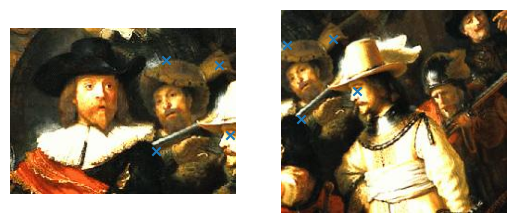

In [48]:
## 1.1
# left image
leftXY = np.array([[157,32],[211,37],[222,107],[147,124]])
plt.subplot(121);
plt.imshow(img1_rgb);
plt.axis('off');
plt.scatter(leftXY[:,0], leftXY[:,1], marker='x');

# right image
rightXY = np.array([[6,38],[56,31],[82,87],[22,118]])

plt.subplot(122);
plt.imshow(img2_rgb);
plt.axis('off');
plt.scatter(rightXY[:,0], rightXY[:,1], marker='x');

In [27]:
### 1.2
def generate_homography(correspondence_points):
    A = []
    for src_point, dest_point in correspondence_points:
        x_src, y_src = src_point
        x_dest, y_dest = dest_point
        A.append([-x_src, -y_src, -1, 0, 0, 0, x_dest * x_src, x_dest * y_src, x_dest])
        A.append([0, 0, 0, -x_src, -y_src, -1, y_dest * x_src, y_dest * y_src, y_dest])

    A = np.array(A)

    _, eigenValues, Vt = np.linalg.svd(A)
    homography_matrix = Vt[-1].reshape(3, 3)

    return homography_matrix, eigenValues, Vt
    

In [49]:
correspondence_points = [
    ([157, 32], [6, 38]),
    ([211, 37], [56, 31]),
    ([222, 107], [82, 87]),
    ([147, 124], [22, 118])
]

homography_matrix1, eigenvalues, eigenvectors = generate_homography(correspondence_points)
print("Homography Matrix:")
print(homography_matrix1)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

Homography Matrix:
[[ 6.01992793e-03  1.85260578e-03 -9.65469266e-01]
 [-1.28489298e-03  5.87693533e-03  2.60304029e-01]
 [ 2.92406406e-06  3.47641692e-06  5.92014402e-03]]
Eigenvalues:
[3.97629405e+04 6.78510753e+03 3.91991138e+02 1.65744494e+02
 7.46495567e+01 2.63663121e+01 1.86428643e+01 1.25538068e-01]
Eigenvectors:
[[-4.83019671e-03 -1.97609009e-03 -2.31700611e-05 -6.49265868e-03
  -3.45723150e-03 -3.52698714e-05  8.79952395e-01  4.74953864e-01
   4.61148230e-03]
 [-2.00581125e-02 -3.07829054e-03 -8.99008978e-05 -5.53692340e-03
   7.30611594e-03 -4.37201352e-06  4.74765243e-01 -8.79829797e-01
  -1.28185466e-03]
 [-7.03997673e-01 -3.10693420e-01 -3.77541986e-03  6.05030562e-01
   2.03724225e-01  3.09422223e-03 -5.70172862e-03  1.19583721e-02
  -9.59134522e-03]
 [-5.13077458e-01 -3.85105090e-01 -4.35883423e-03 -7.56198552e-01
  -1.12655437e-01 -4.11161909e-03 -1.47724539e-02  8.80962126e-03
   5.98861857e-02]
 [-4.75561354e-01  8.07952028e-01 -2.76505184e-03 -3.02738694e-02
  -3.14

In [29]:
src = np.float32([[157,32],[211,37],[222,107],[147,124]])
dest = np.float32([[6,38],[56,31],[82,87],[22,118]])
homoMet = cv2.getPerspectiveTransform(src, dest)
print(homoMet)

[[ 1.01685498e+00  3.12932553e-01 -1.63082057e+02]
 [-2.17037452e-01  9.92701412e-01  4.39692054e+01]
 [ 4.93917724e-04  5.87218302e-04  1.00000000e+00]]


In [8]:
homography_matrix1/homography_matrix1[2,2]

array([[ 1.01685498e+00,  3.12932553e-01, -1.63082057e+02],
       [-2.17037452e-01,  9.92701412e-01,  4.39692054e+01],
       [ 4.93917724e-04,  5.87218302e-04,  1.00000000e+00]])

# Click event handle

In [20]:
### 1.3
correspondences_left = []
correspondences_right = []

# for left image
def click_event_left(event, x, y, flags, param):
#     capture four clicked points and create circles 
    if event == cv2.EVENT_LBUTTONDOWN and len(correspondences_left) < 4:
        correspondences_left.append(((x, y)))
        cv2.circle(img1, (x, y), 5, (0, 100, 255), -1)
#         cv2.circle(img2, (x, y), 5, (100, 0, 255), -1)
        cv2.imshow('Left Image', img1)
#         cv2.imshow('Right Image', img2)
 
# for right image
def click_event_right(event, x, y, flags, param):
#     capture four clicked points and create circles 
    if event == cv2.EVENT_LBUTTONDOWN and len(correspondences_right) < 4:
        correspondences_right.append(((x, y)))
#         cv2.circle(img1, (x, y), 5, (0, 100, 255), -1)
        cv2.circle(img2, (x, y), 5, (100, 0, 255), -1)
#         cv2.imshow('Left Image', img1)
        cv2.imshow('Right Image', img2)

# Create windows
cv2.imshow('Left Image', img1)
cv2.imshow('Right Image', img2)
cv2.setMouseCallback('Left Image', click_event_left)
cv2.setMouseCallback('Right Image', click_event_right)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [25]:
print('left correspondance:', correspondences_left)
print('right correspondance:', correspondences_right)
correspondences = []
for i in range(len(correspondences_left)):
    correspondences.append((correspondences_left[i], correspondences_right[i]))
    
print(correspondences)

left correspondance: [(165, 137), (138, 134), (100, 111), (133, 86)]
right correspondance: [(180, 192), (173, 164), (153, 143), (113, 139)]
[((165, 137), (180, 192)), ((138, 134), (173, 164)), ((100, 111), (153, 143)), ((133, 86), (113, 139))]


In [28]:
###1.4
## calculate homography matrix using svd of above clicked correspondences
print("correspondences", correspondences)
homography_matrix, eigenvalues, eigenvectors = generate_homography(correspondences)
print("Homography Matrix:")
print(homography_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("Eigenvectors:")
print(eigenvectors)

correspondences [((165, 137), (180, 192)), ((138, 134), (173, 164)), ((100, 111), (153, 143)), ((133, 86), (113, 139))]
Homography Matrix:
[[-5.07597843e-03  2.56347801e-03  6.97712451e-01]
 [-3.71126388e-03  8.86886742e-04  7.16319053e-01]
 [-2.93742014e-05 -7.20867528e-07  6.11979374e-03]]
Eigenvalues:
[8.38709726e+04 6.17831991e+03 3.59357400e+02 7.92578002e+01
 3.41138880e+01 8.31101321e+00 1.24274010e+00 2.00703638e-01]
Eigenvectors:
[[-2.21469566e-03 -1.95944475e-03 -1.59553788e-05 -2.29701518e-03
  -2.00297601e-03 -1.64432256e-05  7.50056488e-01  6.61338877e-01
   5.30291400e-03]
 [-1.53609143e-03  3.15412846e-03  1.11235638e-05 -4.75030731e-03
   7.07387333e-04 -1.35910369e-05  6.61344478e-01 -7.50055597e-01
  -2.16992238e-03]
 [-5.43524052e-01 -4.70083494e-01 -3.94533096e-03  5.22153701e-01
   4.59257332e-01  3.82585392e-03  1.85452293e-03 -2.09717876e-03
  -1.81367157e-03]
 [-3.54309284e-01 -2.40725292e-01 -4.85042220e-03 -3.28857347e-01
  -2.88705821e-01 -5.02508587e-03 -4.7

In [29]:
srcP = [row[0] for row in correspondences]
dstP = [row[1] for row in correspondences]
print(np.float32(srcP))
print(np.float32(dstP))
homoMet = cv2.getPerspectiveTransform(np.float32(srcP), np.float32(dstP))
print(homoMet)

[[165. 137.]
 [138. 134.]
 [100. 111.]
 [133.  86.]]
[[180. 192.]
 [173. 164.]
 [153. 143.]
 [113. 139.]]
[[-8.29436194e-01  4.18883073e-01  1.14009145e+02]
 [-6.06436105e-01  1.44921018e-01  1.17049542e+02]
 [-4.79986788e-03 -1.17792782e-04  1.00000000e+00]]


In [30]:
homography_matrix/homography_matrix[2,2]

array([[-8.29436194e-01,  4.18883073e-01,  1.14009145e+02],
       [-6.06436105e-01,  1.44921018e-01,  1.17049542e+02],
       [-4.79986788e-03, -1.17792782e-04,  1.00000000e+00]])

In [69]:
## 1.5
import cv2
import numpy as np

# Load images
left_img = cv2.imread('Left_Img.jpg')
right_img = cv2.imread('Right_Img.jpg')

# Homography matrix obtained from Step 1.2
H = homography_matrix1

# Apply perspective transformation to warp the right image
right_pres = cv2.warpPerspective(right_img, H, (350,168))


# stitching two images
h1, w1 = left_img.shape[:2]
h2, w2 = right_pres.shape[:2]
stitched_img = np.zeros((max(h1, h2), w1+w2,3), np.uint8)
stitched_img[:h1, :w1,:3] = left_img
stitched_img[:h2, w1:w1+w2,:3] = right_pres


# Show the stitched image
cv2.imshow('Stitched Image', stitched_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [98]:
##1.6
import cv2
import numpy as np

# Load images
left_img = cv2.imread('Left_Img.jpg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('Right_Img.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Find keypoints and descriptors
keypoints_left, descriptors_left = sift.detectAndCompute(left_img, None)
keypoints_right, descriptors_right = sift.detectAndCompute(right_img, None)

# Match descriptors using FLANN (Fast Library for Approximate Nearest Neighbors)
flann = cv2.FlannBasedMatcher(dict(algorithm=0, trees=10), {})

matches = flann.knnMatch(descriptors_left, descriptors_right, k=2)

# Apply ratio test to keep good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.25 * n.distance:
        good_matches.append(m)
print("good matches: ",len(good_matches))
# If enough good matches are found
if len(good_matches) > 10:
    src_pts = np.float32([keypoints_left[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints_right[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Estimate homography using RANSAC
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Warp the right image to the perspective of the left image
    stitched_img_sift = cv2.warpPerspective(right_img, H, (left_img.shape[1] + right_img.shape[1], left_img.shape[0]))

    h1, w1 = left_img.shape[:2]
    h2, w2 = stitched_img_sift.shape[:2]
    stitched_img = np.zeros((max(h1, h2), w1+w2), np.uint8)
    stitched_img[:h1, :w1] = left_img
    stitched_img[:h2, w1:w1+w2] = stitched_img_sift

    # Show the stitched image
    cv2.imshow('Stitched Image using SIFT and RANSAC', stitched_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


good matches:  26


# Question 2

In [4]:
##2.0
import cv2
import numpy as np

# Initialize correspondences array
correspondences_left = []
correspondences_right = []

def click_event_left(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN and len(correspondences_left) < 4:
        correspondences_left.append(((x, y), (x, y)))
        cv2.circle(left_img, (x, y), 5, (0, 0, 255), -1)
#         cv2.circle(right_img, (x, y), 5, (0, 0, 255), -1)
        cv2.imshow('Left Image', left_img)
#         cv2.imshow('Right Image', right_img)

def click_event_right(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN and len(correspondences_right) < 4:
        correspondences_right.append(((x, y), (x, y)))
#         cv2.circle(left_img, (x, y), 5, (0, 0, 255), -1)
        cv2.circle(right_img, (x, y), 5, (0, 0, 255), -1)
#         cv2.imshow('Left Image', left_img)
        cv2.imshow('Right Image', right_img)

# Load new images
left_img = cv2.imread('Left_Scene.jpg')
right_img = cv2.imread('Right_Scene.jpg')

# Create windows
cv2.imshow('Left Image', left_img)
cv2.imshow('Right Image', right_img)

cv2.setMouseCallback('Left Image', click_event_left)
cv2.setMouseCallback('Right Image', click_event_right)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
print('left correspondance:', correspondences_left)
print('right correspondance:', correspondences_right)
correspondences = []
for i in range(len(correspondences_left)):
    correspondences.append((correspondences_left[i], correspondences_right[i]))
    
print("Correspondances:", correspondences)

left correspondance: [((294, 338), (294, 338)), ((230, 290), (230, 290)), ((325, 162), (325, 162)), ((391, 301), (391, 301))]
right correspondance: [((401, 260), (401, 260)), ((511, 294), (511, 294)), ((543, 382), (543, 382)), ((383, 533), (383, 533))]
Correspondances: [(((294, 338), (294, 338)), ((401, 260), (401, 260))), (((230, 290), (230, 290)), ((511, 294), (511, 294))), (((325, 162), (325, 162)), ((543, 382), (543, 382))), (((391, 301), (391, 301)), ((383, 533), (383, 533)))]


# Question 3

In [70]:
###3.0
import cv2
import numpy as np

def calculate_Black(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Threshold the image to create a binary mask of black regions
    _, binary_mask = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the width of each black region
    black_region_widths = []
    for contour in contours:
        x, _, w, _ = cv2.boundingRect(contour)
        black_region_widths.append(w)

    return black_region_widths[0] or 0


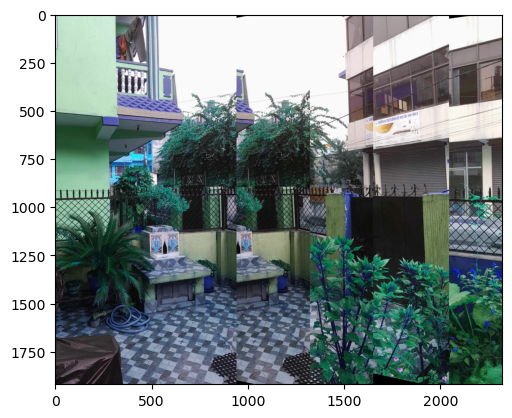

In [71]:
import cv2
import numpy as np

# Load your images
images = [cv2.imread(f'images/S{i}.jpg') for i in range(1, 6)]

# Convert images to grayscale
gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

# Create a SIFT object
sift = cv2.SIFT_create()

keypoints = []
descriptors = []

# Detect keypoints and compute descriptors for each image
for gray_img in gray_images:
    kp, des = sift.detectAndCompute(gray_img, None)
    keypoints.append(kp)
    descriptors.append(des)

# Create a matcher
matcher = cv2.BFMatcher()

matches = []

# Match keypoints between adjacent images
for i in range(4):
    match = matcher.knnMatch(descriptors[i], descriptors[i + 1], k=2)
    matches.append(match)

good_matches = []

# Apply ratio test to get good matches
for match in matches:
    good = []
    for m, n in match:
        if m.distance < 0.45 * n.distance:
            good.append(m)
    good_matches.append(good)

# Initialize an empty list to store the warped images
warped_images = [images[0]]

# Loop through the remaining images to warp and concatenate them
for i in range(1, 5):
    # Get source and destination points for perspective transformation
    src_points = np.float32([keypoints[i - 1][m.queryIdx].pt for m in good_matches[i - 1]]).reshape(-1, 1, 2)
    dst_points = np.float32([keypoints[i][m.trainIdx].pt for m in good_matches[i - 1]]).reshape(-1, 1, 2)
    
    # Compute perspective transformation matrix
    M, _ = cv2.findHomography(dst_points, src_points, cv2.RANSAC, 5.0)
    
    # Warp the current image
    warped = cv2.warpPerspective(images[i], M, (images[i].shape[1], images[i].shape[0]))
    blackWidth = calculate_Black(warped)+20
    warped_images.append(warped[:, blackWidth:])

# Concatenate the warped images to create the panorama
panorama = np.concatenate(warped_images, axis=1)
# Display or save the panorama
# cv2.imshow('Panorama', panorama)
plt.imshow(panorama);

cv2.waitKey(0)
cv2.destroyAllWindows()
